Libs

In [1]:
!pip install qiskit-aer==0.14.2
!pip install qiskit==1.1.1
!pip install qiskit-ibm-runtime==0.26.0
!pip install qiskit_experiments==0.7.0
!pip install matplotlib==3.8.4
!pip install pylatexenc==2.10
!pip install seaborn==0.13.2


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_aer import AerSimulator
from qiskit_experiments.library import ProcessTomography
from qiskit.visualization import plot_bloch_multivector, plot_state_city, array_to_latex
from qiskit.quantum_info import partial_trace, Statevector, DensityMatrix, Operator

Examples

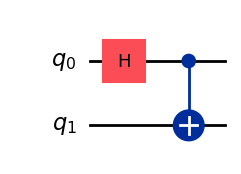

In [3]:
# Create a new circuit with two qubits
qc = QuantumCircuit(2)

# Add a Hadamard gate to qubit 0
qc.h(0)

# Perform a controlled-X gate on qubit 1, controlled by qubit 0
qc.cx(0, 1)

# Return a drawing of the circuit using MatPlotLib ("mpl"). This is the
# last line of the cell, so the drawing appears in the cell output.
# Remove the "mpl" argument to get a text drawing.
qc.draw("mpl")

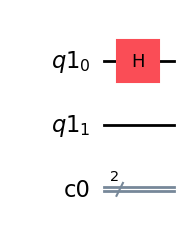

In [4]:
%matplotlib inline
from qiskit.circuit import Register, ClassicalRegister

qr=QuantumRegister(2)
cr=ClassicalRegister(2)
circuit=QuantumCircuit(qr,cr)
circuit.draw()
circuit.h(qr[0])
circuit.draw(output='mpl')

In [5]:
circuit.cx(qr[0],qr[1])
circuit.measure(qr,cr)
circuit.draw()

┌───┐     ┌─┐   
q1_0: ┤ H ├──■──┤M├───
      └───┘┌─┴─┐└╥┘┌─┐
q1_1: ─────┤ X ├─╫─┤M├
           └───┘ ║ └╥┘
c0: 2/═══════════╩══╩═
                 0  1

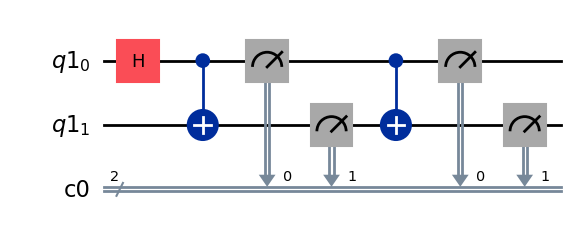

In [6]:
circuit.cx(qr[0],qr[1])
circuit.measure(qr,cr)
circuit.draw()
circuit.draw(output='mpl')


LEZ. 11/12


Stato noto e caratterizziamo il processo, e tramite state tomography valutiamo cosa è successo.

Processo ignoto che voglio caratterizzare e fare poi state tomography (ricostruirlo tramite serie di misure) usando degli stati di ingresso fissati (ripetiamo n volte per ottenere n setup di misura e n possibili stati di input)

La process tomography è un insieme di state tomography (con il quale cerchiamo di inferire un comportamento), dove l'output è una Choi Matrix.
Il risultato viene poi confrontato con il risultato che ci aspettiamo di ottenere (quando possibile ovviamente) e la fidelity ci permette di valutare la distanza del process noto con quello ottenuto sperimentalmente

"Processo ignoto che voglio caratterizzare e fare poi state tomography (ricostruirlo tramite serie di misure) usando stati di ingresso fissati (ripetiamo n volte per ottenere n setup di misura e n possibili stati di input)":

Immagina di avere una scatola nera, il cui funzionamento interno non ti è noto. Questa scatola rappresenta un processo ignoto, ovvero una trasformazione che il tuo sistema quantistico subisce, ma che tu non conosci. Il tuo obiettivo è capire cosa succede dentro questa scatola, ovvero caratterizzare il processo.

Per farlo, utilizzi una tecnica chiamata tomografia di processo. Questa tecnica prevede di "interrogare" la scatola nera con diverse "domande" e osservare le "risposte".

Le "domande" sono rappresentate da stati di ingresso fissati, ovvero stati quantistici che tu prepari e invii alla scatola nera. Immagina di avere un numero di stati di ingresso diversi, che chiami ad esempio |0⟩, |1⟩, |+⟩, |−⟩.

Le "risposte" sono gli stati quantistici che emergono dalla scatola nera dopo aver subito la trasformazione del processo ignoto. Questi stati di uscita dipenderanno sia dallo stato di ingresso che dal processo stesso.

Per ottenere informazioni sul processo, devi ripetere questo esperimento più volte, utilizzando ogni volta uno stato di ingresso diverso. Ripetiamo n volte per ottenere n setup di misura e n possibili stati di input. Questo significa che prepari n copie del tuo sistema quantistico, le prepari in n stati di ingresso diversi, e le invii una alla volta alla scatola nera.

Per ogni stato di ingresso, misuri lo stato di uscita del sistema quantistico. Questa misura ti fornisce alcune informazioni sul processo.

Raccolti tutti i risultati delle misure, utilizzi una tecnica matematica per ricostruire la mappa di Kraus del processo ignoto. La mappa di Kraus è una descrizione matematica completa del processo, che ti permette di capire come il processo trasforma qualsiasi stato quantistico.

Una volta che hai la mappa di Kraus, puoi utilizzare la tomografia di stato per capire come il processo trasforma uno stato quantistico specifico. In altre parole, puoi prendere uno stato quantistico di tuo interesse, applicare il processo (utilizzando la mappa di Kraus) e ottenere lo stato di uscita.

"La process tomography è un insieme di state tomography (con il quale cerchiamo di inferire un comportamento), dove l'output è una Choi Matrix."

Stati di input: Prepariamo diversi stati quantistici di input, ad esempio |0⟩, |1⟩, |+⟩, |−⟩.
Processo incognito: Questi stati vengono "inviati" al processo che vogliamo caratterizzare (la "scatola nera").
Stati di output: Il processo trasforma gli stati di input in stati di output.
Tomografia di stato: Eseguiamo una tomografia di stato su ciascuno stato di output per ricostruirne la matrice di densità.
Raccolta dati: Raccogliamo i risultati di tutte le tomografie di stato.
Ricostruzione del processo: Utilizziamo questi dati per ricostruire la rappresentazione matematica completa del processo, che è la Choi matrix.

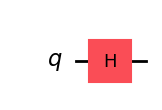

In [7]:
# modello porta di Hadamard

q = QuantumRegister(1, 'q')
circuit = QuantumCircuit(q)

circuit.h(q[0])

circuit.draw(output="mpl")

Classe Operator, prende ingresso array (come l'intero circuito) e restituisce porta corrispondente

In [8]:
target_unitary = Operator(circuit)
array_to_latex(target_unitary)

<IPython.core.display.Latex object>

In [9]:
sim = AerSimulator()

circuit_tomo = ProcessTomography(circuit, sim)

for circ in circuit:
  print(circ)
  display(circ)

CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=())


CircuitInstruction(operation=Instruction(name='h', num_qubits=1, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(1, 'q'), 0),), clbits=())

Ma fino ad adesso non abbiamo ancora eseguito nulla, abbiamo solo visto cosa c'è dentro

In [10]:
res = circuit_tomo.run(sim, shots=10) # shot = num esperimenti
print(res.data())

[{'counts': {'1': 9, '0': 1}, 'job_id': 'fdba9ae1-ff18-4dec-b421-1e68a0e9150c', 'metadata': {'clbits': [0], 'cond_clbits': None, 'm_idx': [0], 'p_idx': [0]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'0': 10}, 'job_id': 'fdba9ae1-ff18-4dec-b421-1e68a0e9150c', 'metadata': {'clbits': [0], 'cond_clbits': None, 'm_idx': [1], 'p_idx': [0]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'1': 5, '0': 5}, 'job_id': 'fdba9ae1-ff18-4dec-b421-1e68a0e9150c', 'metadata': {'clbits': [0], 'cond_clbits': None, 'm_idx': [2], 'p_idx': [0]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'1': 7, '0': 3}, 'job_id': 'fdba9ae1-ff18-4dec-b421-1e68a0e9150c', 'metadata': {'clbits': [0], 'cond_clbits': None, 'm_idx': [0], 'p_idx': [1]}, 'shots': 10, 'meas_level': <MeasLevel.CLASSIFIED: 2>}, {'counts': {'1': 10}, 'job_id': 'fdba9ae1-ff18-4dec-b421-1e68a0e9150c', 'metadata': {'clbits': [0], 'cond_clbits': None, 'm_idx': [1], 'p_idx': [1]}, 'shots':

In [11]:
experimental_res =  res.analysis_results("state").value
array_to_latex(experimental_res)

<IPython.core.display.Latex object>

Ora valuto la process fidelity (sui ps per Qiskit è la fidelity applicata sulle Choi matrix invece di usare le Ro)

In [12]:
from qiskit.quantum_info import process_fidelity, Choi

choi_unitary = Choi(circuit)

fid = process_fidelity(choi_unitary, experimental_res)

print(f"Process fidelity: {fid}")

Target channel is not TP. Tr_2[Choi] - I has non-zero eigenvalues: [-0.28846401  0.28846401]


Process fidelity: 0.9733535204140862


Simulazione con RUMORE

In [13]:
from qiskit._ibm_runtime.fake_provider import FakeManilaN2, FakeNairobiN2

# fake_backend = FakeNairobiN2()

fake_backend = FakeManilaN2()

res_noise = circuit_tomo.run(fake_backend, shots=10)

ModuleNotFoundError: No module named 'qiskit._ibm_runtime'

Gli stabilizer vengono usati anche per la state tomography, dato che quest'ultima non scala facilmente con il numero di qubit

ESECUZIONE IN CLOUD (verrà condiviso il codice)

qui il backend non sarà più un simulatore ma un backend reale, e non viene eseguito il circuito direttamente ma viene schedulato lo Job (che può anche essere visto dalla piattaforma di IBM).
Ci verrà restituito un array [risultato, metadati...]